<a href="https://colab.research.google.com/github/ulises1229/IntroPythonCENAM/blob/master/code/d%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Día 3 - Curso-Taller: Visualización de datos y modelado
##### Autores: Ulises Olivares, Walter Hauri
##### uolivares@unam.mx
##### 14 de diciembre de 2022


### Visualización de datos

In [2]:
# Cargamos la biblioteca de Seaborn para hacer los gráficos
import seaborn as sns
import matplotlib.pyplot as plt # Como ayuda para algunas visualizaciones 

# Así como pandas para la lectura
import pandas as pd

In [3]:
# Agregamos un poco de configuración para las gráficas (puedes explorar un poco más aquí: https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.set_style("dark")
#sns.set_context("poster")

Hacemos la lectura de los datos a graficar

In [4]:
temp = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/temp.csv")
temp.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


##### Gráfico de línea

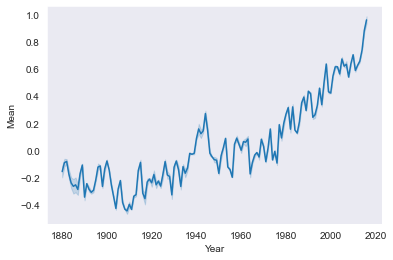

In [5]:
sns.lineplot(data=temp, x="Year", y="Mean");

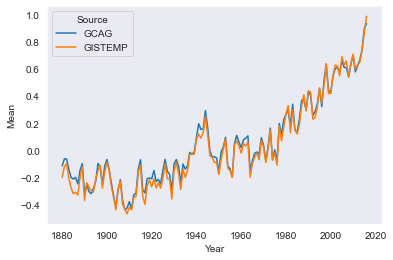

In [6]:
sns.lineplot(data=temp, x="Year", y="Mean", hue="Source"); # Lo separamos por la fuente

##### Datos reales de vibración

Ejemplo con datos de colegas CENAM

In [124]:
# Hacemos la lectura de los datos
vibrations = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/Ejemplo Datos Vibraciones.csv")
vibrations

,Año,Acelerómetro,Frecuencia (Hz),Sensibilidad (mV/m/s2)
0,2018,4519,1.00,9.949000
1,2018,4519,1.25,10.041000
2,2018,4519,1.60,10.100000
3,2018,4519,2.00,10.118000
4,2018,4519,2.50,10.136000
...,...,...,...,...
200,2022,4519,4000.00,9.717321
201,2022,4519,5000.00,9.743084
202,2022,4519,6300.00,9.822070
203,2022,4519,8000.00,9.985855


In [10]:
vibrations.dtypes # Verificamos los tipos de dato

Año                         int64
Acelerómetro                int64
Frecuencia (Hz)           float64
Sensibilidad (mV/m/s2)    float64
dtype: object

In [128]:
vibrations.drop(columns=["Acelerómetro"]).groupby(by=["Año"]).describe()

Frecuencia (Hz)                                                     \
               count         mean         std  min   25%    50%     75%   
Año                                                                       
2018            41.0  1186.897561  2312.70545  1.0  10.0  100.0  1000.0   
2019            41.0  1186.897561  2312.70545  1.0  10.0  100.0  1000.0   
2020            41.0  1186.897561  2312.70545  1.0  10.0  100.0  1000.0   
2021            41.0  1186.897561  2312.70545  1.0  10.0  100.0  1000.0   
2022            41.0  1186.897561  2312.70545  1.0  10.0  100.0  1000.0   

              Sensibilidad (mV/m/s2)                                          \
          max                  count      mean       std       min       25%   
Año                                                                            
2018  10000.0                   41.0  9.929049  0.165108  9.661000  9.784000   
2019  10000.0                   41.0  9.934171  0.164588  9.663000  9.785000   
2020  10000.0                   41.0  9.930660  0.165371  9.668252  9.784751   
2021  10000.0                   41.0  9.933445  0.165075  9.667451  9.790971   
2022  10000.0                   41.0  9.927562  0.165456  9.655896  9.785893   

                                      
           50%        75%        max  
Año                                   
2018  9.949000  10.070000  10.310000  
2019  9.950000  10.072000  10.311000  
2020  9.950896  10.075724  10.313587  
2021  9.951712  10.079601  10.309563  
2022  9.944075  10.066360  10.302132

In [15]:
vibrations_clean = vibrations.rename(columns={"Frecuencia (Hz)": "Frecuencia", "Sensibilidad (mV/m/s2)": "Sensibilidad"})

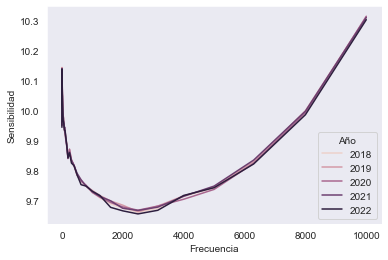

In [56]:
# Graficamos para cada año
sns.lineplot(data=vibrations_clean, x="Frecuencia", y="Sensibilidad", hue="Año");

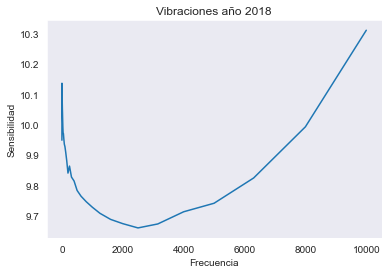

In [103]:
# Un único año
year = 2018
ax = sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == year], x="Frecuencia", y="Sensibilidad")
ax.set_title(f"Vibraciones año {year}");

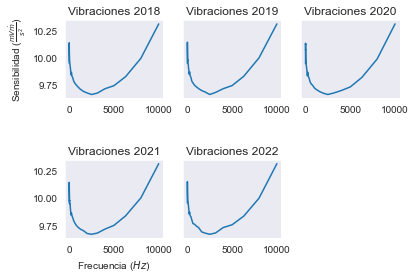

In [99]:
# Una figura con un gráfico por año

fig = plt.Figure(figsize=(10, 10))
fig.tight_layout(pad=10.0)

ax1 = plt.subplot(2, 3, 1)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2018], x="Frecuencia", y="Sensibilidad")
ax1.set(title="Vibraciones 2018", xlabel="", ylabel=r"Sensibilidad ($\frac{mV \dot m}{s^2}$)")

ax2 = plt.subplot(2, 3, 2)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2019], x="Frecuencia", y="Sensibilidad")
ax2.set(title="Vibraciones 2019", ylabel="", xlabel="")
ax2.set_yticklabels([])

ax3 = plt.subplot(2, 3, 3)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2020], x="Frecuencia", y="Sensibilidad")
ax3.set(title="Vibraciones 2020", ylabel="", xlabel="")
ax3.set_yticklabels([])

ax4 = plt.subplot(2, 3, 4)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2021], x="Frecuencia", y="Sensibilidad")
ax4.set(title="Vibraciones 2021", xlabel=r"Frecuencia ($Hz$)", ylabel="")

ax5 = plt.subplot(2, 3, 5)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2022], x="Frecuencia", y="Sensibilidad")
ax5.set(title="Vibraciones 2022", ylabel="", xlabel="")
ax5.set_yticklabels([])

plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.show()

Otro ejemplo con una señal de impacto mecánico

In [121]:
# Leemos los datos y los visualizamos
signal = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/Imp_2k_signals-1.csv", header=None, sep="\t")
signal.head()

,0,1,2
0,0.494516,-0.469049,-0.020447
1,0.494516,-0.456371,-0.020142
2,0.494516,-0.469049,-0.020599
3,0.494516,-0.456371,-0.020905
4,0.481850,-0.469049,-0.019379


In [ ]:
signal = signal.rename(
    {
        0: "?",
        1: "?",
        2: "?",
    })

In [123]:
signal.shape

(1000000, 3)

In [129]:
signal.describe()

,0,1,2
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.022800,-0.069697,-0.000370
std,0.461007,0.472262,0.045914
min,-0.822748,-0.785981,-3.998260
25%,-0.468100,-0.545112,0.000000
50%,-0.012124,-0.076053,0.000000
75%,0.431186,0.405685,0.000000
max,0.722504,0.709940,1.633148


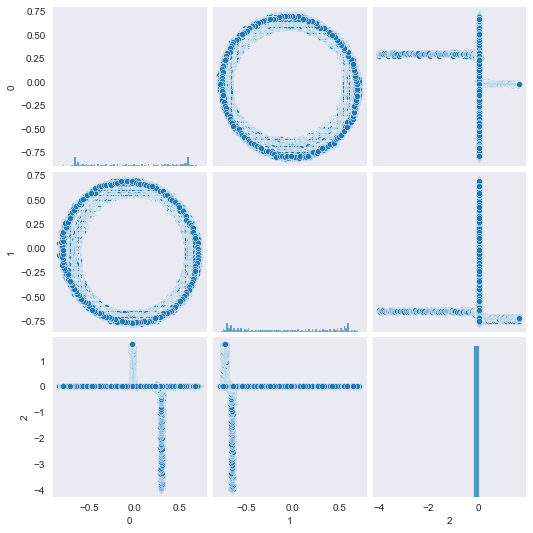

In [131]:
sns.pairplot(data=signal);

Hacemos la lactura de los datos a graficar

In [11]:
flights = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


Gráfico de dispersión

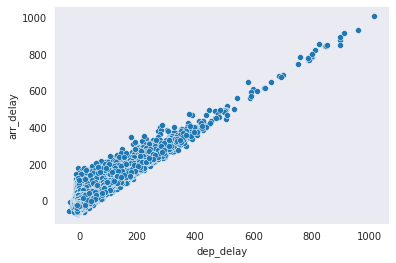

In [23]:
sns.scatterplot(data=flights, x="dep_delay", y="arr_delay");

In [17]:
flights["delay"] = flights["arr_delay"] - flights["dep_delay"] # Evaluamos el retraso neto del vuelo

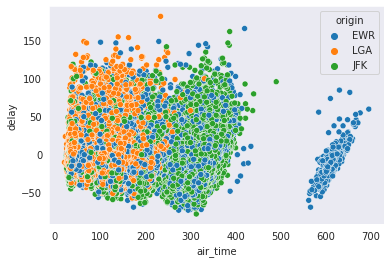

In [26]:
sns.scatterplot(data=flights, x="air_time", y="delay", hue="origin");

##### Ejemplo de vibraciones

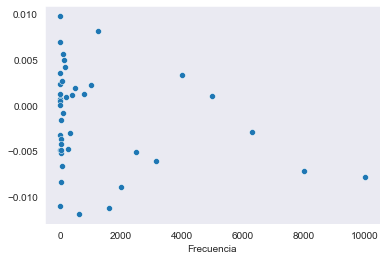

In [118]:
# Calculamos la diferencia entre dos años
year_1 = 2018
year_2 = 2022

vibrations_y1 = vibrations_clean[vibrations_clean["Año"] == year_1]
vibrations_y2 = vibrations_clean[vibrations_clean["Año"] == year_2]

# Calculamos la diferencia
difference = vibrations_y2["Sensibilidad"].values - vibrations_y1["Sensibilidad"].values

sns.scatterplot(x=vibrations_y1["Frecuencia"], y=difference);

##### Histograma de frecuencias

Hacemos la lectura de los datos a graficar

In [28]:
salaries = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/salaries.csv")
salaries.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


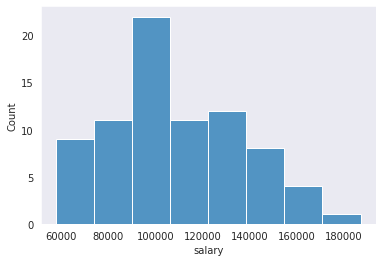

In [38]:
sns.histplot(data=salaries, x="salary");

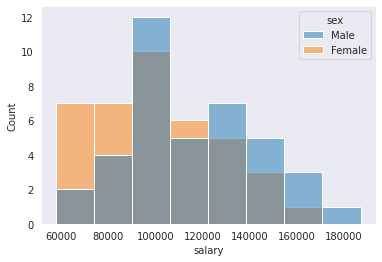

In [36]:
sns.histplot(data=salaries, x="salary", hue="sex");

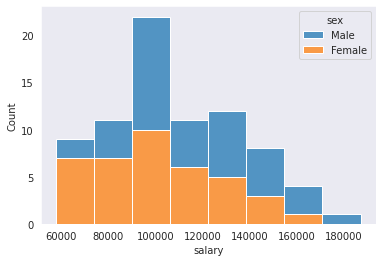

In [37]:
sns.histplot(data=salaries, x="salary", hue="sex", multiple="stack");

##### Gráfico de barras

In [79]:
# Sacamos la distancia promedio de los vuelos para cada destino
mean_distance_per_carrier = flights[["distance", "carrier"]].groupby(by=["carrier"]).mean()
mean_distance_per_carrier

,distance
carrier,
AA,1340.235999
AS,2402.000000
DL,1236.901206
UA,1529.114873
US,553.456272


In [80]:
# Convertimos el índice (dest) a una columna para poder graficar
mean_distance_per_carrier.reset_index(inplace=True)

# Los ordenamos de mayor a menor
mean_distance_per_carrier.sort_values(by="distance", inplace=True, ascending=False)

mean_distance_per_carrier

,carrier,distance
1,AS,2402.000000
3,UA,1529.114873
0,AA,1340.235999
2,DL,1236.901206
4,US,553.456272


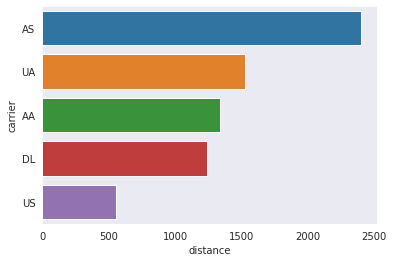

In [81]:
sns.barplot(data=mean_distance_per_carrier, x="distance", y="carrier");

##### Gráfico de caja y bigote

Hacemos la lectura de los datos a graficar

In [84]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/diamonds.csv", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


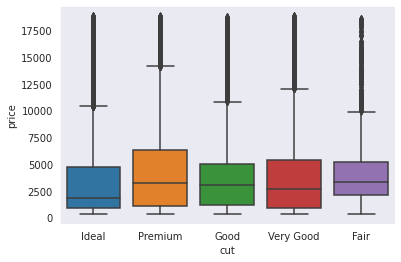

In [88]:
sns.boxplot(data=diamonds, x="cut", y="price");

In [89]:
# Calculamos un aproximado del volumen del diamante según sus dimensiones
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

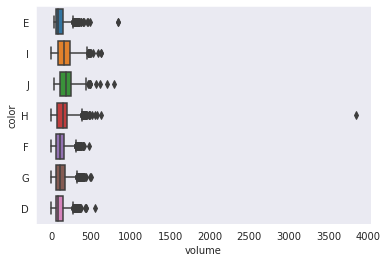

In [97]:
sns.boxplot(data=diamonds, x="volume", y="color", orient="h");

In [100]:
# Eliminamos los valores extremos para visualizar mejor la gráfica
diamonds_clean = diamonds.loc[diamonds["volume"] < 1000]

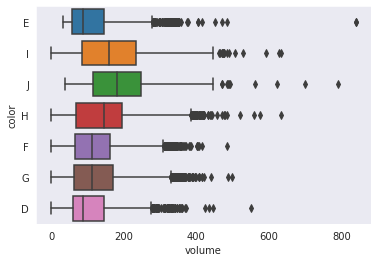

In [101]:
sns.boxplot(data=diamonds_clean, x="volume", y="color", orient="h");